# Tipsbet Analysis


## Initialisation

In [1]:
from tips import Tips
import datetime as dt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.style.use('dark_background')
plt.style.use('seaborn')
graph_size=(14,10)

## Load Data
The Tips module loads data all the data between the given start and end dates (both default to today if not given)

In [3]:
start = dt.datetime.now() - dt.timedelta(days=1000)
t = Tips(start)

## Functions
Functions to be used to analyse/plot data

In [4]:
def get_cumsum(df, col=None):
    pass
    

In [5]:
filter_fn = t.df.Time > pd.to_datetime(dt.date.today() - dt.timedelta(days=1))
filter_fn &= t.df.Time < pd.to_datetime(dt.date.today())
# filter_fn &= t.df.Status == 'L'
t.df[filter_fn]

,Time,Country,Sport,Competitions,Teams,Tip,Odds,Results,Status,Return,Profit
12779,2020-08-11 20:00:00,Europe,Football,Europa League,Shakhtar – Basel,1x,1.22,4-1,W,1.22,0.22
12780,2020-08-11 20:00:00,Europe,Football,Europa League,Wolves – Sevilla,under 3.5,1.20,0-1,W,1.20,0.20
12781,2020-08-11 18:00:00,Scotland,Football,Premiership,Dundee Utd – Hibernian,x2,1.35,0-1,W,1.35,0.35
12782,2020-08-11 23:15:00,Brazil,Football,Serie B,Botafogo SP – Confianca,1x,1.22,2-0,W,1.22,0.22
12783,2020-08-11 13:00:00,China,Football,Super League,C. Lifan – Qingdao H.,1x,1.25,0-0,W,1.25,0.25
12784,2020-08-11 20:00:00,Italy,Football,Serie B,Spezia – Chievo,under 3.5,1.20,3-1,L,0.00,-1.00
12785,2020-08-11 18:00:00,Norway,Football,OBOS ligaen,KFUM Oslo – Lillestrom,over 1.5,1.20,1-2,W,1.20,0.20
12786,2020-08-11 16:00:00,Russia,Football,Premier League,R. Volgograd – Zenit,2,1.35,0-2,W,1.35,0.35
12787,2020-08-11 18:00:00,Slovakia,Football,Fortuna liga,Zilina – Nitra,1,1.29,1-2,L,0.00,-1.00
12788,2020-08-11 18:00:00,Sweden,Football,Superettan,Halmstad – Osters,1,1.63,2-0,W,1.63,0.63


## Lee's Questions

In [24]:
st = t.df.groupby('Status')

In [23]:
t.df.groupby('Status').Odds.mean()

Status
?    1.336731
L    1.366640
W    1.317537
Name: Odds, dtype: float64

In [27]:
st.Profit.agg(['sum', 'mean', 'count'])

,sum,mean,count
Status,,,
?,-52.00,-1.000000,52
L,-3414.00,-1.000000,3414
W,2965.48,0.317537,9339


In [34]:
t.df.Tip = t.df.Tip.str.strip()

In [40]:
t.df['Positive'] = np.where(t.df.Profit >= 0, 'Y', 'N')

In [41]:
t.df.groupby(['Tip', 'Positive']).Profit.sum()

Tip        Positive
1          N          -1430.00
           Y           1254.10
1 or 2     N            -21.00
           Y             16.36
1 sau 2    Y              0.44
1x         N           -431.00
           Y            359.90
2          N           -615.00
           Y            580.59
over 1.5   N           -316.00
           Y            234.91
over 2.5   N            -98.00
           Y             72.46
over 3.5   N             -3.00
           Y              4.83
over 4.5   N             -1.00
peste 1.5  Y              0.24
under 2.5  Y              1.16
under 3.5  N           -301.00
           Y            257.59
under 4.5  N            -24.00
           Y             19.17
x2         N           -214.00
           Y            157.11
Name: Profit, dtype: float64

## Analysis

In [6]:
t.df[t.df.Time >= pd.to_datetime(dt.date.today())].Odds.agg('prod')

44.462025214903285

In [7]:
print(t.df.Time.dt.date.min(), '-', t.df.Time.dt.date.max())
print(t.df.Status.value_counts().to_string() + '\n')
print((t.df.Status.value_counts(normalize=True).round(4) * 100).to_string())

2017-11-17 - 2020-08-12
W    9339
L    3414
?      52

W    72.93
L    26.66
?     0.41


In [8]:
print(t.df.groupby('Sport').Status.value_counts().to_string())
print((t.df.groupby('Sport').Status.value_counts(normalize=True).round(4) * 100).to_string())

Sport       Status
Basketball  W          525
            L          222
            ?            3
Football    W         7971
            L         2842
            ?           46
Tennis      W          843
            L          350
            ?            3
Sport       Status
Basketball  W         70.00
            L         29.60
            ?          0.40
Football    W         73.40
            L         26.17
            ?          0.42
Tennis      W         70.48
            L         29.26
            ?          0.25


In [9]:
# t._update_dataset(t.full_dataset)
# t.store_df()

In [10]:
fd = t.full_dataset
stake = 5
filt = lambda x : (fd.Time > dt.datetime(2020, 1, 1)) & (fd.Odds > x) & (fd.Sport == 'Football')
profits = [fd[filt(x/100)].Profit.sum() * stake for x in range(100, 300, 5)]
avg_profit = fd.Profit.mean()

# ax = plt.figure(figsize=graph_size)
# plt.bar([a/100 for a in range(100,300,5)], profits)


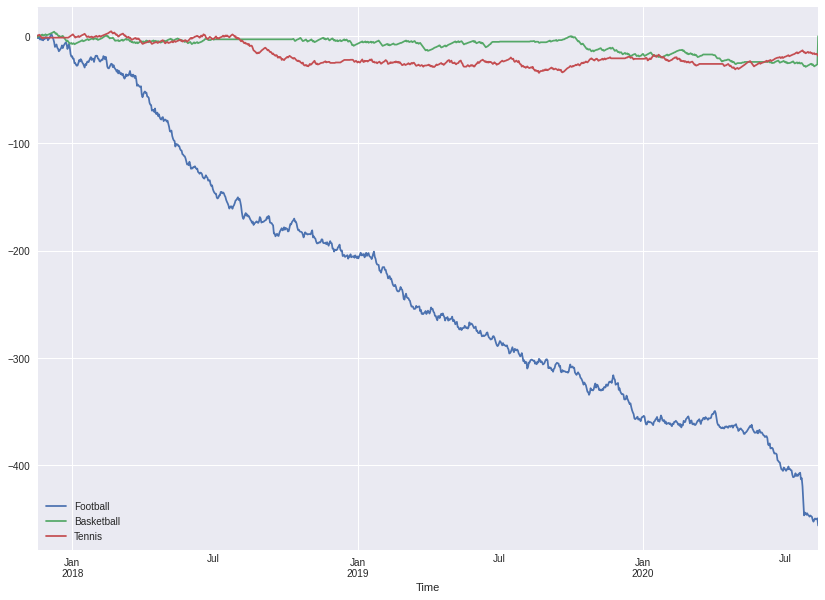

In [11]:
sports = t.df.Sport.unique()
df_sports = pd.DataFrame(index=t.df.resample('1D', on='Time').agg({'Profit': 'sum'}).index)
for sport in sports:
    filt = (t.df.Sport == sport)
    df_sports[sport] = t.df[filt].resample('1D', on='Time').agg({'Profit': 'sum'}).sort_index()
    df_sports[sport] = df_sports[sport].cumsum().fillna(0)

df_sports.plot(figsize=graph_size)

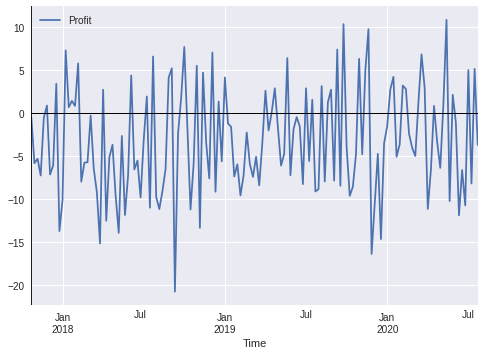

In [12]:
filtered = fd[fd.Time < dt.datetime(2020,7,23)].resample('1W', on='Time').agg({'Profit': 'sum', 'Odds': 'mean', 'Sport': 'size'})
ax = filtered.plot(y='Profit')
ax.axhline(y=0, color='k', linewidth=1)
ax.axvline(x=fd.Time.min(), color='k')


In [13]:
sample = fd.copy()
sample['Select'] = (np.random.random(size=sample.Sport.size) < 0.2) * sample.Return
# sample.Select = sample.Select.replace(0, 1)
print(sample.Select.max())
print((sample.resample('1D', on='Time').agg({'Select': 'prod', 'Odds': 'size'}).Select.replace(0, -1) * stake).sum())

2.1
-5005.0


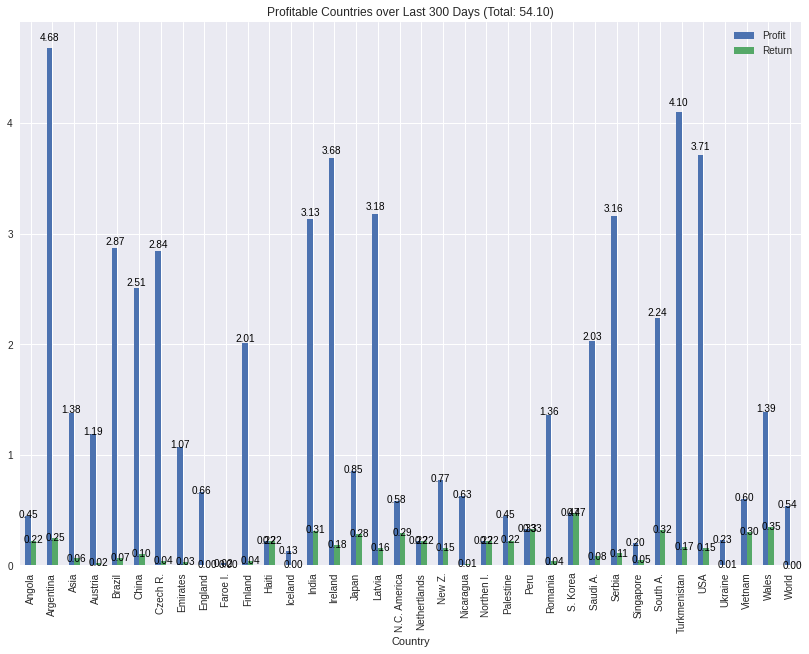

In [14]:
days = 300
filt_fn = t.df.Time > pd.to_datetime(dt.date.today() - dt.timedelta(days=days))
subset = t.df[filt_fn].groupby(['Country']).agg({'Profit': 'sum', 'Return': 'size'})
subset = subset[subset.Profit > 0]
subset.Return = subset.Profit / subset.Return
subset_plot = subset.plot.bar(figsize=graph_size, title=str('Profitable Countries over Last {}' + 
                                                            ' Days (Total: {:.2f})'
                                                           ).format(days, subset.Profit.sum()))

font = {'color': 'black'}

for p in subset_plot.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    subset_plot.text(x + width / 2.0, y + height * 1.02,
            '{:.2f}'.format(height), horizontalalignment='center',
            verticalalignment='center', fontdict=font)

In [22]:
t.df.groupby('Country').Odds.mean()

Country
Africa       1.331333
Angola       1.225000
Argentina    1.351290
Armenia      1.250000
Asia         1.337879
               ...   
Ukraine      1.270588
United K.    1.350000
Vietnam      1.300000
Wales        1.356857
World        1.373219
Name: Odds, Length: 104, dtype: float64


In [16]:
t.df[t.df.Odds <= 1.3].Status.value_counts(normalize=True).round(4) * 100


W    78.07
L    21.56
?     0.36
Name: Status, dtype: float64

In [17]:
t.df['Return'].value_counts()

0.00    3466
1.20    1398
1.22    1394
1.25    1052
1.44     473
        ... 
1.76       1
1.78       1
1.56       1
1.82       1
2.45       1
Name: Return, Length: 73, dtype: int64

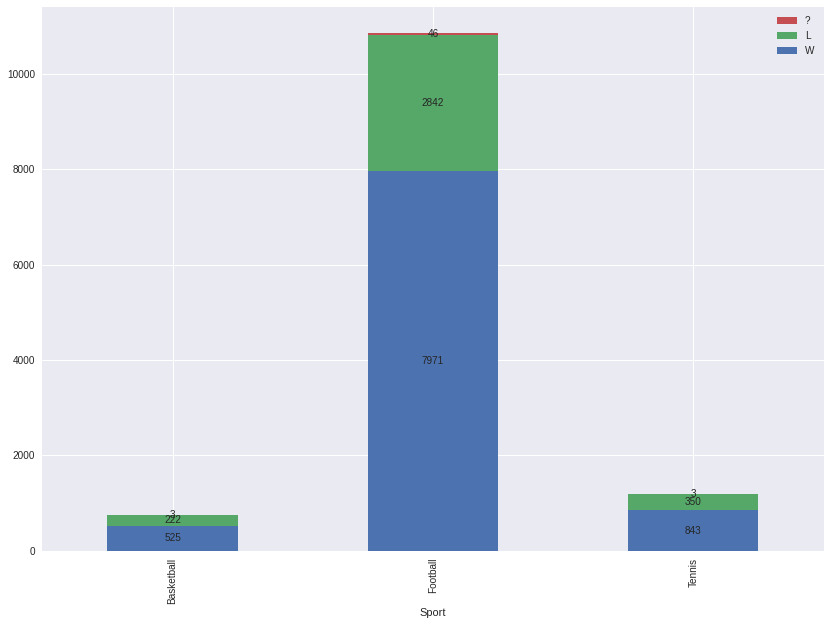

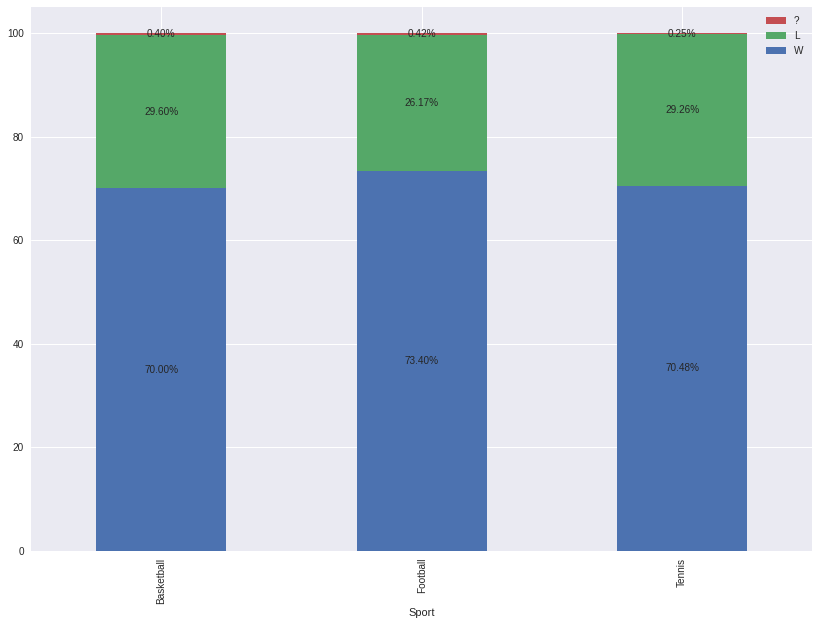

In [18]:
t.plot_status(by='Sport', relative=False)
t.plot_status(by='Sport', relative=True)

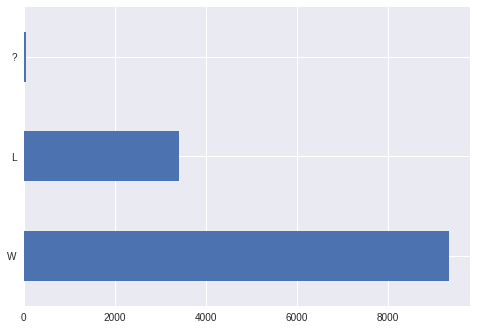

In [19]:
t.df.Status.value_counts().plot(kind='barh')